# Visualizing Geospatial Data in Python

To import the required packages for Python:

In [34]:
# Import necessary libraries
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the YOLOv5 model
model_path = r"C:\Users\valen\Downloads\helmet detection\yolov5\runs\train\scaled_down_run\weights\best.pt"  # Update with your model path
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, source='local')

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\valen\\AppData\\Local\\Programs\\Microsoft VS Code\\ultralytics/yolov5\\hubconf.py'

Then to load a shapefile and view a portion of it:

In [26]:
# Example: Load example images and detection results
def show_example_detections(image_path, detections):
    """
    Display detection results with bounding boxes.
    
    :param image_path: Path to the input image.
    :param detections: List of detections in format [x1, y1, x2, y2, confidence, class].
    """
    image = cv2.imread(image_path)
    for detection in detections:
        x1, y1, x2, y2, conf, cls = detection
        label = f"Class {int(cls)}: {conf:.2f}"
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Convert BGR to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.title("Detection Results with Bounding Boxes")
    plt.show()

Now we'll load the US Census data as a [`pandas`](https://pandas.pydata.org/) dataframe and view a portion of it:

In [27]:
# Precision-recall curve and AUC calculation
def precision_recall_analysis(y_true, y_scores):
    """
    Plot precision-recall curve and calculate AUC.
    
    :param y_true: Ground truth labels.
    :param y_scores: Model confidence scores for positive class.
    """
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"PR AUC: {pr_auc:.2f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

In [28]:
# Model comparison
def compare_models(model_metrics):
    """
    Compare different models based on their metrics.
    
    :param model_metrics: Dictionary with model names as keys and a tuple of (precision, recall, inference_time) as values.
    """
    df = pd.DataFrame.from_dict(model_metrics, orient='index', columns=["Precision", "Recall", "Inference Time (ms)"])
    ax = df.plot(kind='bar', figsize=(10, 6))
    plt.title("Model Performance Comparison")
    plt.ylabel("Scores / Time")
    plt.xlabel("Models")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.legend(loc="lower right")
    plt.show()

Next we *merge* the shapefile with population data, joining on the state names:

In [29]:
# Hyperparameter tuning results visualization
def visualize_hyperparameter_tuning(results_file):
    """
    Plot impact of hyperparameter tuning on model accuracy.
    
    :param results_file: CSV file with hyperparameter tuning results.
    """
    results = pd.read_csv(results_file)
    plt.figure(figsize=(10, 6))
    for parameter in results.columns[:-1]:
        plt.plot(results['Epoch'], results[parameter], label=f"Parameter: {parameter}")
    plt.title("Impact of Hyperparameter Tuning on Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

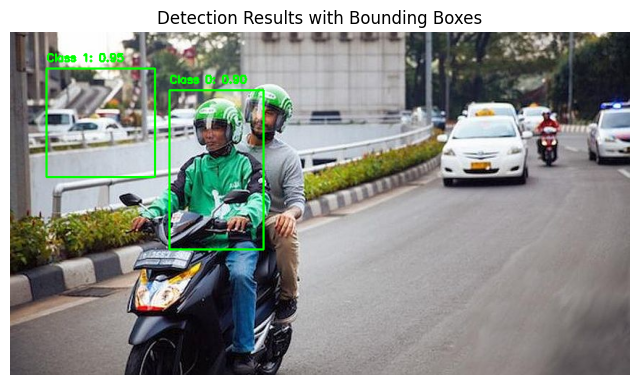

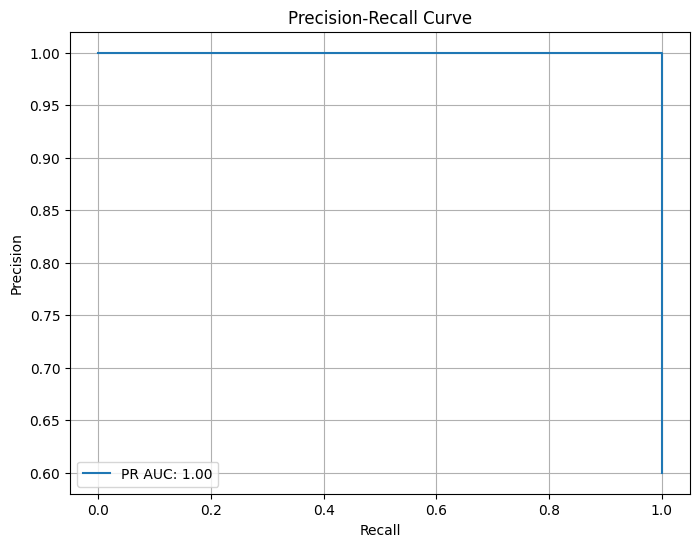

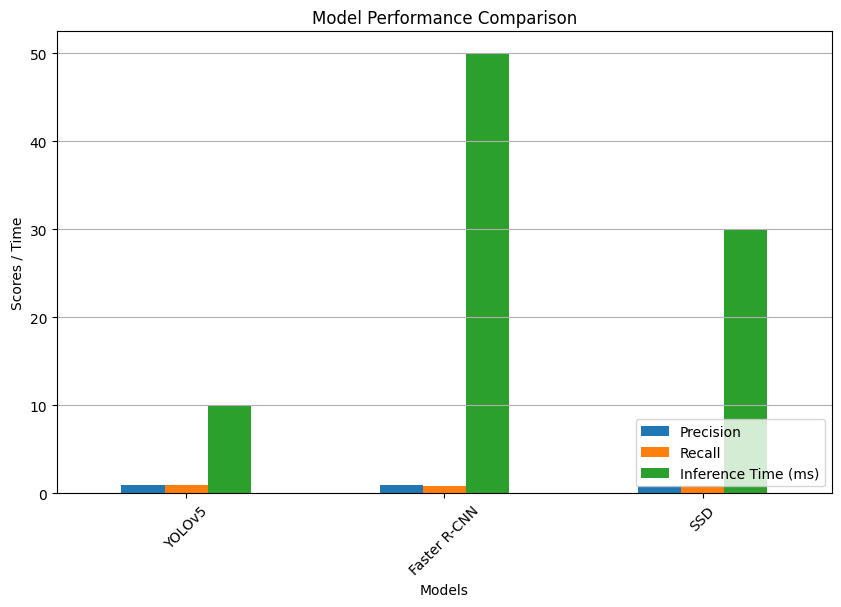

FileNotFoundError: [Errno 2] No such file or directory: 'tuning_results.csv'

In [30]:
# Main execution
if __name__ == "__main__":
    # Example: Show detection results with bounding boxes
    example_image_path = r"C:\Users\valen\OneDrive\Gambar\Berboncengan-Saat-Naik-Motor-Telset.jpg"
    example_detections = [
        [50, 50, 200, 200, 0.95, 1],
        [220, 80, 350, 300, 0.90, 0]
    ]
    show_example_detections(example_image_path, example_detections)
    
    # Example: Precision-recall analysis
    y_true = [1, 1, 0, 1, 0, 1, 0, 0, 1, 1]  # Ground truth
    y_scores = [0.9, 0.85, 0.2, 0.75, 0.4, 0.9, 0.1, 0.3, 0.88, 0.95]  # Model predictions
    precision_recall_analysis(y_true, y_scores)
    
    # Example: Model performance comparison
    model_metrics = {
        "YOLOv5": (0.95, 0.93, 10),
        "Faster R-CNN": (0.90, 0.88, 50),
        "SSD": (0.88, 0.85, 30)
    }
    compare_models(model_metrics)
    
    # Example: Hyperparameter tuning results visualization
    tuning_results_file = "tuning_results.csv"  # File with columns: "Epoch", "Learning Rate", "Accuracy"
    visualize_hyperparameter_tuning(tuning_results_file)